**There are 4 problems. Please read the questions carefully and complete the tasks below. Upload your codes with output using the naming convention "SudarsanAcharya_MCL605FinalLabExam.ipynb" to https://tinyurl.com/17ohpzxi**

In [1]:
library(ggplot2)

**Problem-1**: A hospital administrator codes incoming patients suffering gunshot wounds according to whether they have insurance (coding 1 if they do and 0 if they do not) and according to their condition, which is rated as good (g), fair (f), or serious (s). Suppose 10 patients come in during a very busy period at the hospital. Compute the following probabilities using simulation:

1. probability that at most 3 are serious patients and at least 6 are insured.
2. probability that at least 4 patients who are *both* serious and uninsured.

In [19]:
# Sampling space 
S = paste0(replicate(3, c(0,1)), c('g', 'f', 's'))
# Correspnding probabilites for the outcomes in the sampling space
p = (1/ length(S)) * replicate(length(S), 1)

simulationsize = 100000
npatients = 10 # number of patients who come in

simulatedData = replicate(simulationsize, sample(S, size = npatients, prob = p, replace = TRUE))
#print(simulatedData) # use only for checking with simulationsize = 10

# Function to check if at most 3 are serious patients and at least 6 are insured
# patients
checkEvent1 = function(data){
  # Extract the first numeral in the simulated data
  #print(data)
  # getting the 1 or 0
  numbers = as.numeric(substr(data, 1, 1))
  #print(numbers)
  # Extract the second character in the simulated data
  # getting the g, s or f
  conditions = substr(data, 2, 2)
  #print(conditions)
  if ((sum(conditions == 's') <= 3) && (sum(numbers == 1) >= 6)){
    return(1)
    }
  return(0)
  }

#apply(simulatedData, 2, checkEvent1)
approximate_probability = sum(apply(simulatedData, 2, checkEvent1)) / simulationsize
cat('Approximate probability of getting at most 3 serious and at least 6 insured patients = ', approximate_probability, '\n')

# Function to check if at least 4 patients who are both serious and uninsured
checkEvent2 = function(data){
  if (sum(data == '0s') >= 4){
    return(1)
    }
  return(0)
  }

approximate_probability = sum(apply(simulatedData, 2, checkEvent2)) / simulationsize
cat('Approximate probability of getting at least 4 patients who are both serious and uninsured = ', approximate_probability, '\n')

Approximate probability of getting at most 3 serious and at least 6 insured patients =  0.21077 
Approximate probability of getting at least 4 patients who are both serious and uninsured =  0.07065 


**Problem-2**: The number of times that a person contracts a cold in a given year is a Poisson random variable with parameter $\lambda=5.$  Suppose that a new wonder drug (based on large quantities of vitamin C) has just been marketed that reduces the Poisson parameter to $\lambda=2$ for 70 percent of the population. For the remaining population, the drug has no appreciable effect on colds.

1. As a member of a pharmaceutical decision making body, you are interested in knowing how likely is it that the drug is beneficial for an individual if he/she tries the drug for a year and has $1$ cold in that time. Calculate this probability. **Hint**: apply Bayes' theorem to $P(\text{Drug beneficial}\ |\ \text{1 cold}).$
2. You will approve the drug for production if 10 people who tried the drug for a year and have 1 cold in that time each, the probability that the drug is beneficial for at least 8 of them is greater than 98%. Will you approve the drug or not? 

In [86]:
p_DB = 0.7 # probability that drug is beneficial
p_DNB = 0.3 # probability that drug is not beneficial

p = (dpois(1, 2) * p_DB) / ((dpois(1, 2) * p_DB) + (dpois(1, 5) * p_DNB)) # probability that drug is beneficial gievn 1 cold

cat('probability that drug is beneficial gievn 1 cold', p, '\n\n')

# calculate a probability to decide if you will approve the drug or not
cat('probability to decide if you will approve the drug or not', 1 - pbinom(7, 10, p))

probability that drug is beneficial gievn 1 cold 0.9493581 

probability to decide if you will approve the drug or not 0.9880888

**Since the probability of beneficial for atleast 8 of them is approximately 98%, i would approve drug**

**Problem-3**: A man claims to have extrasensory perception (ESP). As a test, a fair coin is flipped $10$ times and the man is asked to predict the outcome in advance. He gets $7$ out of $10$ correct. What is the probability that he would have done *at least* this well if he had no ESP?

**Hint**: If he had no ESP, what would be the probability of success, i.e. guessing an outcome? You can treat the number of correct guesses if he had no ESP as an appropriate discrete random variable $X.$

In [30]:
n = 10
p = 0.5
j = 7
# Having no ESP and predicting the X >= 7 is same as having no ESP and predicting X < 6
prob_noESP = 1 - pbinom(6, n, p)
cat('no ESP, what would be the probability of success: ', prob_noESP)

no ESP, what would be the probability of success:  0.171875

**Problem-4**: Suppose a random number of $K$ customers shop at a supermarket in a day. Let $X_1,X_2,\ldots,X_K$ represent the random number of items purchased independently by the $1$st, $2$nd, $\ldots,$ $K$th customer. The total number of items sold in a day is a random number $Y$ such that: $$ Y = X_1+X_2+\cdots+X_K.$$ Suppose that $30$ customers visit the supermarket on an average per day. Each individual customer is 
* 20% likely to be in the age group 20-40 (encoded as 0) who buys on an average 10 items based on a Poisson distribution. 
* 35% likely to be in the age group 40-60 (encoded as 1) who buys on an average 20 items based on a Poisson distribution.
* 45% likely to be in the age group 60 and above (encoded as 2) who buys on an average 5 items based on a Poisson distribution.

Calculate the probability that the total number of items sold in a day exceeds 350 using simulation. After that, plot a histogram showing the distribution of the total number of items sold in a day. Explain in one sentence the relationship between the mean and median of the total number of items sold in a day using the shape of the histogram.

In [58]:
simulationsize = 10000

Y = integer(length(simulationsize)) # create an array full of zeros for the entire simulation
K = rpois(simulationsize, 30)

for (i in 1:length(K)){
  if (K[i] != 0){
    customertype = sample(c(0, 1, 2), size = K[i], prob = c(0.2, 0.35, 0.45), replace = TRUE)
    Y[i] = sum(rpois(sum(customertype == 0), 10)) + sum(rpois(sum(customertype == 1), 20)) + sum(rpois(sum(customertype == 2), 5))
    }
}

# # Fraction of days where the total number of items sold in a day exceeds 350
length(Y[Y> 350]) / simulationsize

[1] 0.4096

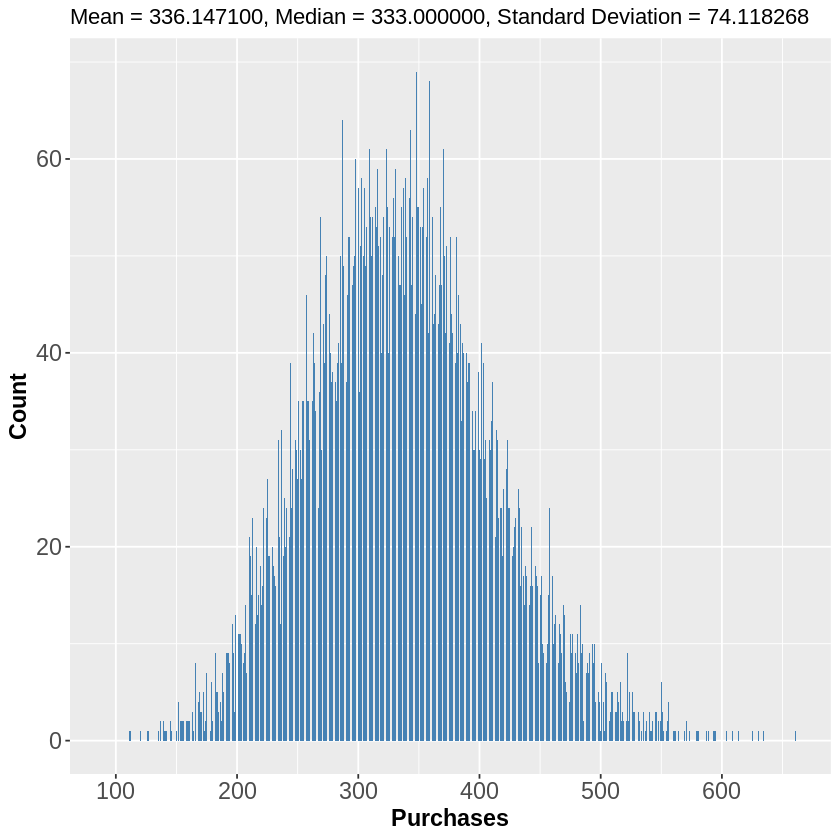

In [72]:
df = as.data.frame(Y)
colnames(df) = c('Purchases')
p1 = ggplot(data = df, aes(x = Purchases)) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue') +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold")) +
  labs(y = 'Count',
       title = sprintf('Mean = %f, Median = %f, Standard Deviation = %f', mean(Y), median(Y), sd(Y)))
p1       

**Median is lower than the mean which means maximum frequency occurence of the items sold falls in the left of the mean**